# Probability and Statistics


August 24, 2023


##### **Some Notations:**

X: Scalar, N-dimensional for N observations/samples;

$X_{i}$: single measurement of the above, where $i$ goes from 1 to N;

{$X_i$}: The set of all N measurements;

h(X): "True" distribution from which the $X_i$ are drawn---this can take a variety of forms such as Gaussian, Uniform, Spiky etc.


The **Probability density function** aka PDF is defined as:

Probability for X to lie in an interval $[X, X+dX] = h(X)dX$

Here, $h(X)$ is the Probability density function, which should be normalized:

$$\int_{-\infty}^{\infty} h(X) dX = 1$$


The **Cumulative Distribution Function** aka CDF *of a probability distribution* is defined as:


$$H(X) = \int_{-\infty}^{X} h(X') dX' = 1$$


0.9999999999999999


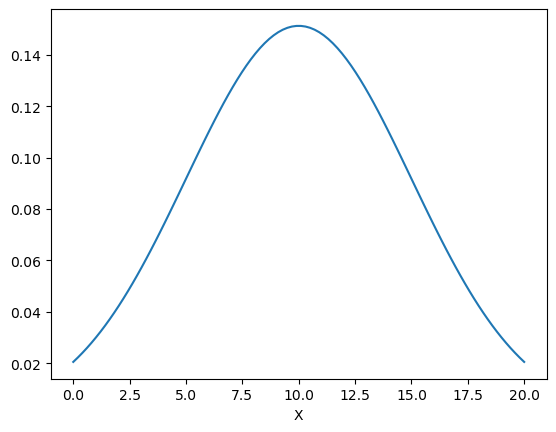

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a Gaussian normal PDF:

X = np.linspace(0,20,100)
mu = 10.
sigma = 5.

def gaussian_normal(X, mu, sigma):
    G = 1/sigma*np.sqrt(2*np.pi) * np.exp(-1./2*((X-mu)**2/sigma**2))
    return(G/np.linalg.norm(G))

PDF = gaussian_normal(X, mu, sigma)
# Check normalization:
print(np.linalg.norm(PDF))

#Plot:

plt.plot(X, PDF)
plt.xlabel("X")
plt.show()

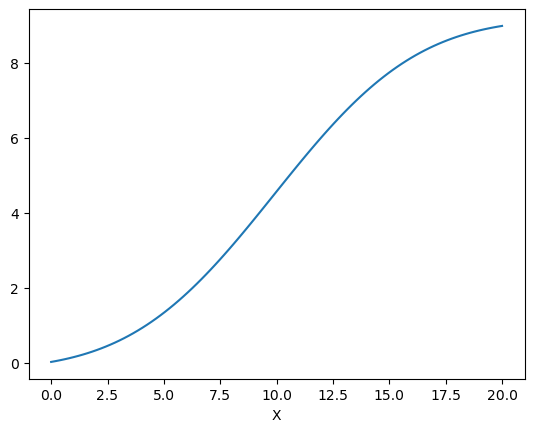

In [2]:
# Compute the CDF of this PDF:

plt.plot(X, np.cumsum(PDF))
plt.xlabel("X")
plt.show()

## Introducing the **model** distribution:

Say you make a set of measurements of the height of students in a class (expected to be Gaussian for large enough numbers of students). Your measurements will give you an *estimated* distribution of heights, which is $h(X)$. But how sure are you that the actual, inherent distribution is Gaussian? It could be something more wanky, like a sombrero distribution. We can **model** any number of such  

Note: Here, $h(X)$ is said to be the true distribution (unaffected by noise? No, since the true distribution describes what's in nature and noise is also part of nature). Since the data has to be faithful to this distribution that's actually out there, all measurements we make follow $h(X)$. But we don't know the form of $h(X)$ inherently, and this is something we need to infer. This is typically done using model selection, comparing several models for the distribution to see which one fits best.

Introduce $f(X)$ has a model for a "true" PDF $h(X)$.
Then, $F(X)$ will be the corresponding CDF for $H(X)$.


#### Some things to keep in mind when working with distributions, whether measured or modelled: **The Kolmogorov axioms** <br><br>

1. $P(A) \geq 0$ - Probabilities are always non-negative <br><br>
2. $P{\Sigma}) = 1$, i.e. $\int P(X)dX = 1$, where $\Sigma$ is the universal set. <br><br>
3. If $A_1, A_2, ..., A_i$ are disjoint sets, $P(\bigcup_{i=1}^{N} A_i) = \sum_{i=i}^{N} P(A_i)$  <br><br>


##### **The Conditional Probability**

$$P(A\cap B) = P(A|B)P(B) = P(B|A)P(A)$$

Here, $P(A|B)$ is the conditional probability of event A given B, and  $P(B|A)$ is that of event B given A. These don't need to be equal, but the above product holds when multiplied by the individual probabilities of the event that has already occurred.

*In these notes, we shall use $P(A,B) = P(A\cap B)$.*

##### **Law of total probability**

$$P(A) = \sum_{i} P(A|B_{i})P(B_{i})$$


## Random Variables
A random or stocastic variable is a variable that can take a set of possible different values, each with an associated probability. 


However, if $A$ and $B$ are independent random variables, then 

$$p(A,B) = p(A)p(B)$$

Let's look an example.

If you have a bag with 5 marbles, 3 yellow and 2 blue and you want to know the probability of picking 2 yellow marbles in a row, that would be

$$p(Y_1,Y_2) = p(Y_1)p(Y_2|Y_1).$$

$p(Y_1) = \frac{3}{5}$ since you have an equally likely chance of drawing any of the 5 marbles.

If you did not put the first marble back in the back after drawing it (sampling *without* "replacement"), then the probability

$p(Y_2|Y_1) = \frac{2}{4}$, so that

$$p(Y_1,Y_2) = \frac{3}{5}\frac{2}{4} = \frac{3}{10}.$$

But if you put the first marble back, then

$p(Y_2|Y_1) = \frac{3}{5} = p(Y_2)$, so that 

$$p(Y_1,Y_2) = \frac{3}{5}\frac{3}{5} = \frac{9}{25}.$$

In the first case $A$ and $B$ (or rather $Y_1$ and $Y_2$) are *not* independent, whereas in the second case they are.

We say that two random variables, $A$ and $B$ are independent *if*

$p(A,B) = p(A)p(B)$ (knowing $B$ does not give any information about $A$ and vice versa).

## Bayes' Rule

We have that 

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the **marginal probability** as

$$p(x) = \int p(x,y)dy,$$

where marginal means essentially projecting on to one axis (integrating over the other axis).

We can re-write this as

$$p(x) = \int p(x|y)p(y) dy$$

Note that if X and Y are independent random variables, the marginal probability of X and the probability of X are one and the same. In this case, $p(x,y) = p(x)p(y)$, and the integral above will be trivial given the orthonormality of Y. 

If two random variables are interlinked, then it doesn't make sense about talking just about the probability of one of them without accounting for what the other is doing, i.e. it is either $P(X|Y)$ or it's $P(X)$ marginalized to be independent of Y.


Since $$p(x|y)p(y) = p(y|x)p(x)$$ we can write that

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$
which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial, though its application can be as we'll discuss later.

In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are *not* independent as, once you pick a $y$, your values of $x$ are constrained.

The *marginal* distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the **conditional probability** (of $x$) for three $y$ values: $$p(x|y=y_0)$$  These are just "slices" through the 2-D distribution.

![http://www.astroml.org/_images/fig_conditional_probability_1.png](http://www.astroml.org/_images/fig_conditional_probability_1.png)

### Examples: Bayes with Lego 

An example with Lego's (it's awesome):
[https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)

Also, **the Monty Hall problem** especially with a Bayesian interpretation.

## Example: Contingency Table

We can also use Bayes' rule to learn something about false positives and false negatives.

Let's say that we have a test for a disease.  The test can be positive ($T=1$) or negative ($T=0$) and one can either have the disease ($D=1$) or not ($D=0$).  So, there are 4 possible combinations:
$$T=0; D=0 \;\;\;  {\rm true \; negative}$$
$$T=0; D=1 \;\;\; {\rm false \; negative}$$
$$T=1; D=0 \;\;\; {\rm false \; positive}$$
$$T=1; D=1 \;\;\; {\rm true \; positive}$$

All else being equal, you have a 50% chance of being misdiagnosed.  Not good!  But the probability of disease and the accuracy of the test presumably are not random.

If the rates of false positive and false negative are:
$$p(T=1|D=0) = \epsilon_{\rm FP}$$
$$p(T=0|D=1) = \epsilon_{\rm FN}$$

then the true positive and true negative rates are just:
$$p(T=0| D=0) = 1-\epsilon_{\rm FP}$$
$$p(T=1| D=1) = 1-\epsilon_{\rm FN}$$

Let's assume that $\epsilon_{\rm FP}=0.02$ and $\epsilon_{\rm FN}=0.001$. 

In graphical form this 2x2 p(T=0 or 1|D=0 or 1) matrix is:
![http://www.astroml.org/_images/fig_contingency_table_1.png](http://www.astroml.org/_images/fig_contingency_table_1.png)

If we have a **prior** regarding how likely the disease is, we can take this into account.

$$p(D=1)=\epsilon_D$$

and then $p(D=0)=1-\epsilon_D$. Say, $\epsilon_D$ = 0.01. 

Now assume that a person tested positive. What is the probability that this person has the disease? Is it 98% 
because $\epsilon_{\rm FP}=0.02$?

We can't just read $p(D=1|T=1)$ off the table because the table entry is the conditional probability of the *test* given the *data*, $p(T=1|D=1)$. What we want is the conditional probability of the *data* given the *test*, that is, $p(D=1|T=1)$.

Bayes' rule then can be used to help us determine how likely it is 
that you have the disease if you tested positive:

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1)},$$

where $$p(T=1) = p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1).$$

So
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}$$

That means that to get a reliable diagnosis, we need $\epsilon_{FP}$ to be quite small.  (Because you *want* the probability to be close to unity if you test positive, otherwise it is a *false* positive).

In our example, we have a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{\rm FP}=0.02$).  

So we have
$$p(D=1|T=1) = \frac{0.01}{0.02+0.01} = 0.333$$

Then in a sample of, e.g.,  1000 people, 10 people will *actually* have the disease $(1000*0.01)$, but another 20 $(1000*0.02)$ will test positive! 

Therefore, in that sample of 30 people who tested positive, only 1/3 has the disease
(not 98%!). 

Same math, with often surprising results, applies to DNA tests of murder suspects...

### COVID-19 example

Let's assume that current estimates of the rate of **false positive** tests for COVID-19 are $\sim 2.0\%$.

Estimates of the rate of **false negative** swab tests for COVID-19 are $\sim12\%$.

Current daily average infection count per 100,000 in Nearby County is 164. 

Let's assume that translates to a current **disease probability** of $164/100000 = 0.164\%$.



<font color='red'>Plug in some of these numbers to estimate $p(D=1|T=1)$ for COVID-19 in Nearby County.</font>

<font color='red'>ANSWER here-- 6.74\%</font>

$$p(D=1|T=1) = \frac{p(T=1|D=1)P(D=1)}{P(T=1)}$$

In [7]:
# Probability of Disease:
P_d = 164./100000

# False negative:
P_fn = 0.12 

# True Positive:
P_tp = 1 - P_fn

# False Positive:
P_fp = 0.02

# Marginalized probability for T=1:
P_t = P_tp*P_d + P_fp*(1-P_d)


# Probability of having COVID given a positive test:

P_covid = (P_tp * P_d)/P_t

print(P_covid*100)

6.740649404027948


## Descriptive Statistics
##### *The Moments of a distribution*

How can one describe the nature of a probability/statistical distribution?

Let's generate a mock distribution resembling some measurements of a parameter tracked in bin counts:

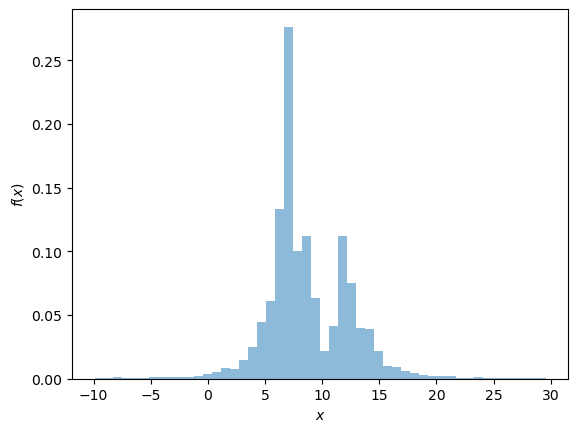

In [4]:
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats


#------------------------------------------------------------
# Let's generate some data: a mix of several Cauchy distributions
random_state = np.random.RandomState(seed=0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * scipy.stats.cauchy(mu, gamma).pdf(x)
                    for (mu, gamma, f) in mu_gamma_f])
data = np.concatenate([scipy.stats.cauchy(mu, gamma).rvs(int(f * N), 
                                                         random_state=random_state)
                       for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(data)
data = data[data > -10]
data = data[data < 30]

# make a histogram to get an idea of what the distribution looks like
plt.hist(data, bins=50, density=True, alpha=0.5);
plt.xlabel('$x$');
plt.ylabel('$f(x)$');

The above distribution has several features, notably the **range** of values of $x$, the **two peaks** (and a dip), the general bimodal shape, the spread or **width** of the distribution, the **skewness** i.e. how the first peak is taller, and so on. There are several ways to quantify these features.

### 1) **Location**

This determines single values $\in x$ showing different features. Most common amoung these are locations of the peaks (modes), or the Mean / Median values of the distribution.

The **Median** is probably easiest, being the value exactly in the middle of the sampling / measurements.


In [7]:
print(f"Median = {np.median(data):.2f}")

Median = 7.67


The **Mean** is the first *moment* of the probability distribution, defined as:

$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$ 

This is actually known as the **sample arithmetic mean**, and derives from *Monte Carlo integration* to get the first moment of the distribution, i.e. 

$$\mu = E(x) = \langle x \rangle = \int_{-\infty}^{\infty} x\, h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N x_i $$

where $\{x_i\}$ are random samples from the properly normalized $h(x)$, and $E(\cdot)$ means the **expectation value**. In general we can use random sampling and Monte Carlo integration to deduce integrals over distributions such that 

$$\int_{-\infty}^{\infty} g(x) h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N g(x_i)$$

In [8]:
print(f"Mean = {np.mean(data):.2f}")

Mean = 8.71


Notice that the mean here is greater than the median, though both of them lie "within" the first, tall peak of the distribution, as expected. 

While it's most common to compute the mean, it may surprise you to learn that some distributions do not have formally calculable means (integration gives infinity). In these and other cases, the **median** is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by **outliers**.

To understand the previous statement, think about replacing some numbers in the high tail edge of the distribution with larger numbers. The mean would be strongly affected by these corrupted points, but **cumulative statistics based on the ordering of samples would remain unaffected by the outlier corruption**.





Mean = 8.81
Median = 7.67


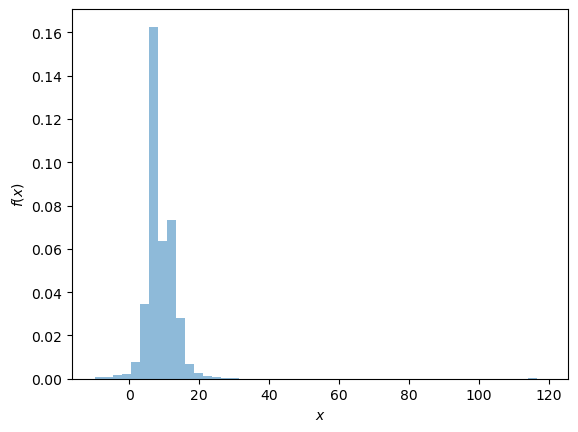

In [32]:
# Generate outliers:

# Add your choice of corrupt data points, check how the mean/median is affected by the numbers of these points.

n_corrupt_datapoints = 10
outs = np.random.uniform(100,120,n_corrupt_datapoints)
data_n = np.concatenate([data, outs], axis=0)

plt.hist(data_n, bins=50, density=True, alpha=0.5);
plt.xlabel('$x$');
plt.ylabel('$f(x)$');

print(f"Mean = {np.mean(data_n):.2f}")
print(f"Median = {np.median(data_n):.2f}")

The Median is robust to adding $~10\%$ of outliers, whereas the Mean starts to deviate even for a handful of outliers. Of course, this variation also depends on the magnitude of the outliers (change the range that is set to between $100$ and $200$ above), as well as the sampling of the original distribution. The mean (and median) is more robust with higher numbers of measurements of distribution.

The relationship between the mean and the median is determined by the skewness of the distribution (Q: does it also depend on the width?), as we shall see later.

### 2) **Variance**

Beyond the "average" *location* value, we'd like to know something about **deviations** from the average (which is related to the *shape* of the distribution).  The simplest thing to compute is deviation from mean $$d_i = x_i - \mu.$$  However, the average deviation is zero by definition of the mean.  The next simplest thing to do is to compute the **mean absolute deviation (MAD)**:

$$\frac{1}{N}\sum|x_i-\mu|,$$

but the absolute values can hide the true scatter of the distribution [in some cases (see here)](http://www.mathsisfun.com/data/standard-deviation.html).  So the next simplest thing to do is to square the differences $$\sigma^2 = \frac{1}{N}\sum(x_i-\mu)^2,$$ which we call the **variance**.

The *variance* $V$ is just expectation value of $(x-\mu)^2$ (and related to the *2nd moment*)

$$\sigma^2 = V = E((x-\mu)^2)\int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

where $\sigma$ is the **standard deviation**. Again, the integral gets replaced by a sum for discrete distributions. While most familiar for Gaussian distributions, you can compute the variance even if your distribution is not Gaussian.  




In [37]:
var = np.var(data)
std = np.std(data)
print(f"Variance = {var:.2f}, Standard Deviation = {std:.2f}")

Variance = 14.11, Standard Deviation = 3.76


### Cumulative (Width) Statistics: Percentiles and Quantiles

**$P\%$ quantiles (or the $p^\mathrm{th}$ percentile, $q_p$)** are computed as
$$\frac{p}{100} = H(q_p) = \int_{-\infty}^{q_p}h(x) dx$$

The full integral from $-\infty$ to $\infty$ is 1 (100%).  So, here you are looking for the value of x that accounts for $p$ percent of the distribution.

For example, the 25th, 50th, and 75th percentiles:



In [41]:
q25, q50, q75 = np.percentile(data, [25, 50, 75])
print(f"The 25, 50 and 75 percentiles are: {q25:.2f}, {q50:.2f}, {q75:.2f}")

The 25, 50 and 75 percentiles are: 6.67, 7.67, 11.62


The **interquartile range** is the difference between the 25th and 75th percentiles, $q_{75} - q_{25}$. This can also be called the $50\%$ Confidence interval.

*Note: the **Credible** interval is a property of Bayesian statistics.*

Just as with the median, the interquartile range is a more *robust* estimator of the scale of a distribution than the standard deviation.  So, one can create a width estimater (at least for a Gaussian) from the interquartile range as

$$\sigma_G = 0.7413\times(q_{75} - q_{25})$$  

The normalization makes it *unbiased* for a perfect Gaussian (more on that later).

In [42]:
print(f"The interquartile range is {q75 - q25:.2f}")

The interquartile range is 4.94


astroML calculates a *rank-based* estimate of the standard deviation, which is basically derived from the interquartile range:

sigmaG = 0.7413 * (q75 - q25)

where $$0.7413 \sim \frac{1}{2 \sqrt{2}~\rm{erf}^{-1}(0.5)}$$

In [45]:
print(f"rank-based stdev: {astroMLstats.sigmaG(data):.2f}")

rank-based stdev: 3.66


### 3) Higher Moments

Other useful ***shape*** measures include the "higher order" moments (the **skewness** and **kurtosis**):

$$\mathbf{Skewness}\quad\quad \Sigma = \int_{-\infty}^{\infty}  \left(\frac{x-\mu}{\sigma}\right)^3 h(x) dx,$$
 
$$\mathbf{Kurtosis}\quad\quad K = \int_{-\infty}^{\infty}  \left(\frac{x-\mu}{\sigma}\right)^4 h(x) dx  - 3.$$

The skewness measures the distribution's *asymmetry*. Distribution's with long tails to larger $x$ values have positive $\Sigma$. 

The kurtosis measures how peaked or flat-topped (a.k.a. how *thicc*) a distribution is, with strongly peaked ones being positive and flat-topped ones being negative. $K$ is calibrated to a Gaussian distribution (hence the subtraction of $3$).

In [38]:
skew = scipy.stats.skew(data)
kurt = scipy.stats.kurtosis(data)
print(f"Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")

Skewness = 0.37, Kurtosis = 2.88


The Kurtosis is here is close to $3$ i.e. that of the Gaussian distribution.

### 4) Mode (Peak):

The **mode** is the most probable value, determined from the peak of the distribution, which is the value where the derivative is 0 (i.e. the turning point):

$$ \left(\frac{dh(x)}{dx}\right)_{x_m} = 0$$

Another way to estimate the mode (at least for a Gaussian distribution) is

$$x_m = 3q_{50} - 2\mu$$

In [51]:
# Summary descriptive statistics for our distribution
q25, q50, q75 = np.percentile(data, [25, 50, 75])

print(f"Location: mean = {np.mean(data):.2f}, median = {np.median(data):.2f}, mode = {3*q50 - 2*np.mean(data):.2f}")
print(f"Scale: variance = {np.var(data):.2f}, standard deviation = {np.std(data):.2f}, rank-based stdev = {astroMLstats.sigmaG(data):.2f}")
print(f"Shape: skewness = {scipy.stats.skew(data):.2f}, kurtosis = {scipy.stats.kurtosis(data):.2f}")
print(f"Percentiles: 25th: {q25:.2f}, 50th: {q50:.2f}, 75th: {q75:.2f}")
print(f"50% Confidence Interval: {q75 - q25:.2f}")

Location: mean = 8.71, median = 7.67, mode = 5.58
Scale: variance = 14.11, standard deviation = 3.76, rank-based stdev = 3.66
Shape: skewness = 0.37, kurtosis = 2.88
Percentiles: 25th: 6.67, 50th: 7.67, 75th: 11.62
50% Confidence Interval: 4.94
